# FORCASTING USING SARIMA MODEL

### Libraries

pip install pmdarima

In [1]:
import pandas as pd
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore", message="No supported index is available.")

### Data

In [2]:
df = pd.read_csv("Cacao Production (DDN).csv", 
            index_col = "Date", 
            parse_dates = True)
df.head()

,Production
Date,
2010-01-01,60.92
2010-01-04,78.35
2010-01-07,106.59
2010-01-10,86.97
2011-01-01,63.26


In [15]:
#training and test
training = df.iloc[:-11, :]
test = df.iloc[-11:, :]

## SARIMA Model

In [16]:
#SARIMA model
model = auto_arima(y = training.Production,
                   m = 7)

In [17]:
#Predictions
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index
predictions[:5]

Date
2021-01-07    398.339067
2021-01-10    425.742432
2022-01-01    317.892867
2022-01-04    387.194521
2022-01-07    421.563895
dtype: float64

<Axes: xlabel='Date'>

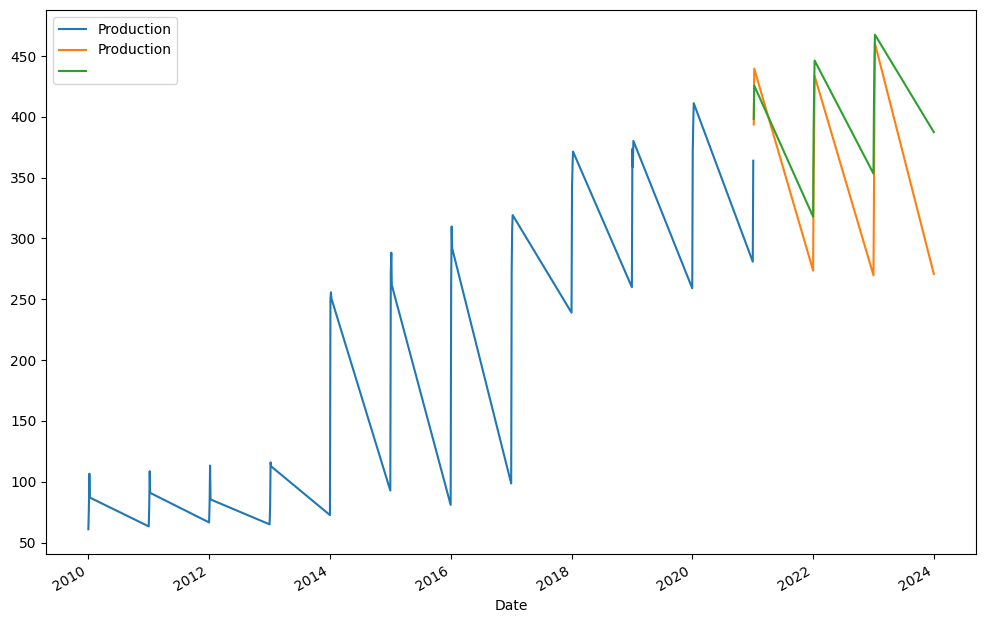

In [18]:
#Visualization
training['Production'].plot(figsize=(12, 8), legend = True)
test['Production'].plot(figsize=(12, 8), legend = True)
predictions.plot(legend=True)